## BIKE SHARING ASSIGNMENT

## STEP1: Importing Libraries

In [1298]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## STEP:2 Reading and Understanding Data

In [1299]:
BIKE=pd.read_csv("day.csv")

In [1300]:
print(BIKE.shape)
BIKE.info()

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Checking Data

In [1301]:
## check for null values in all columns
print('Null values sum in each cloumn\n',BIKE.isnull().sum())

Null values sum in each cloumn
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [1302]:
## check for duplication of rows
duplicate= BIKE.duplicated()
duplicate.sum()

0

In [1303]:
BIKE.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1304]:
BIKE.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping Columns

In [1305]:
## Dropping the columns which are not required and not available for prediction 
## Instant and dteday are dropped as they are not necessary and  also we have yr,month columns separately
## casual and registerd variables are not available for future prediction
BIKE.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
BIKE.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## STEP:3 VISUALIZING DATA
### we will make a pairplot of all numerical variables for understanding relation between them

<Figure size 1440x1440 with 0 Axes>

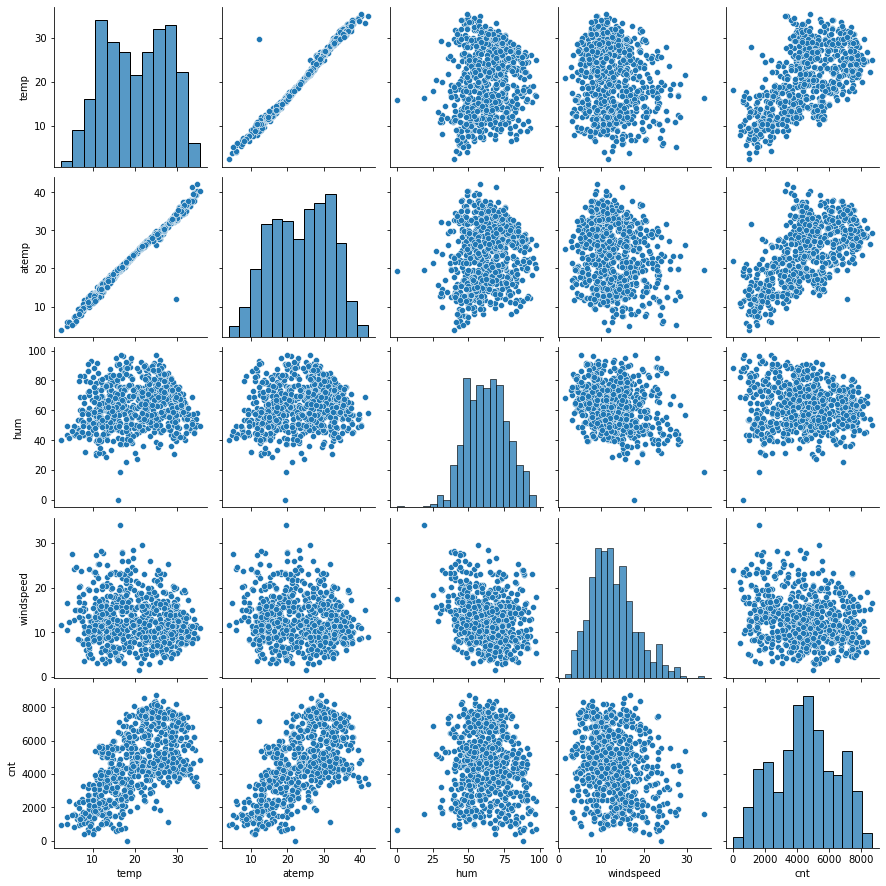

In [1306]:
plt.figure(figsize=(20,20))
sns.pairplot(data=BIKE,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

#### From Above it is observed that
1. temp and atemp are positively correlated with cnt
2. hum and windspeed are negatively correlated with cnt

There exists a linearrelationship between cnt and other independent numerical variables

## Visualizing Categorical Variables

BOX PLOTS

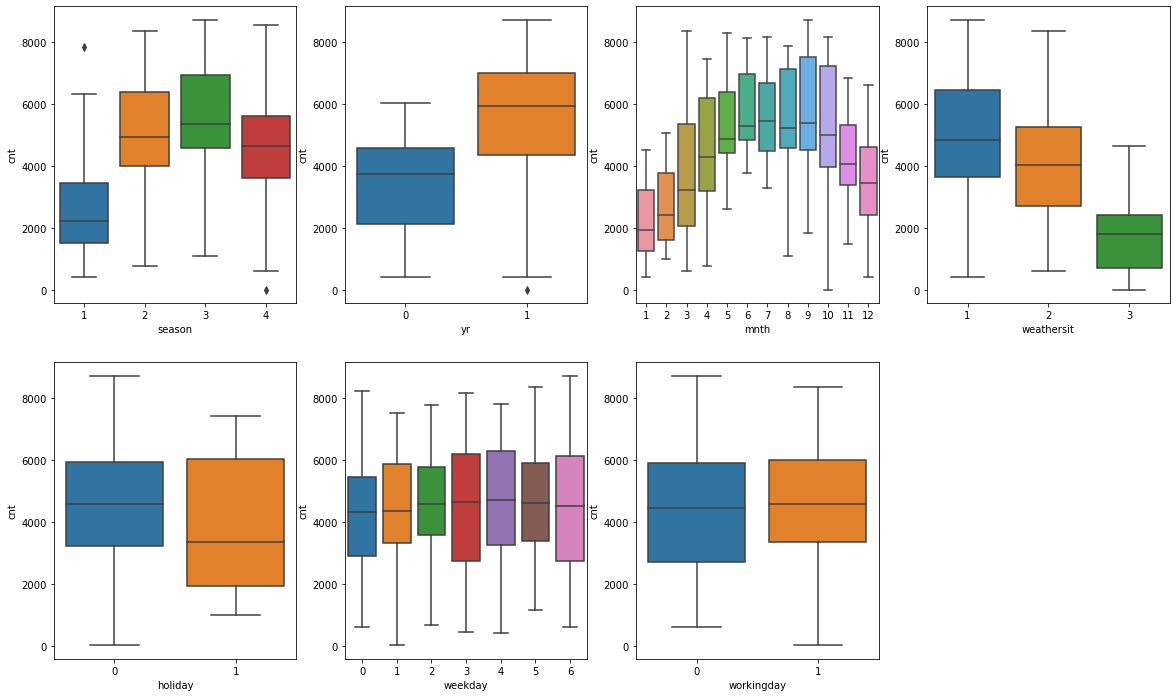

In [1307]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = BIKE)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = BIKE)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = BIKE)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BIKE)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = BIKE)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = BIKE)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = BIKE)
plt.show()

####  OBSERVATIONS

Season-3(FALL) had better rental business  among all seasons and  season-2&4 were better than season1

In 2019 business seems progressed a lot better

In mid of the year may-october more number of users are there

Clear weather was best for many riders for roaming

Holidays are best for touring as a result more bike rentals were given



## STEP:3 DATA PREPARATION

In [1308]:
## Assigning type category to categorical variables

BIKE['season']=BIKE['season'].astype('category')
BIKE['mnth']=BIKE['mnth'].astype('category')
BIKE['weekday']=BIKE['weekday'].astype('category')
BIKE['weathersit']=BIKE['weathersit'].astype('category')
BIKE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### Creating Dummy Variables

In [1309]:
BIKE_1=pd.get_dummies(BIKE,drop_first=True)
BIKE_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

## Step 4: Splitting the Data into Training and Testing Sets

It is the first basic step for building model. we will perform a train-test split.

In [1310]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(BIKE_1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1311]:
print(df_train.shape)
print(df_test.shape)


(510, 30)
(219, 30)


### Rescaling the variables
This is done so we will have better interpretation of the coefficients of the model

In [1312]:
scaler = MinMaxScaler()

In [1313]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation between variables


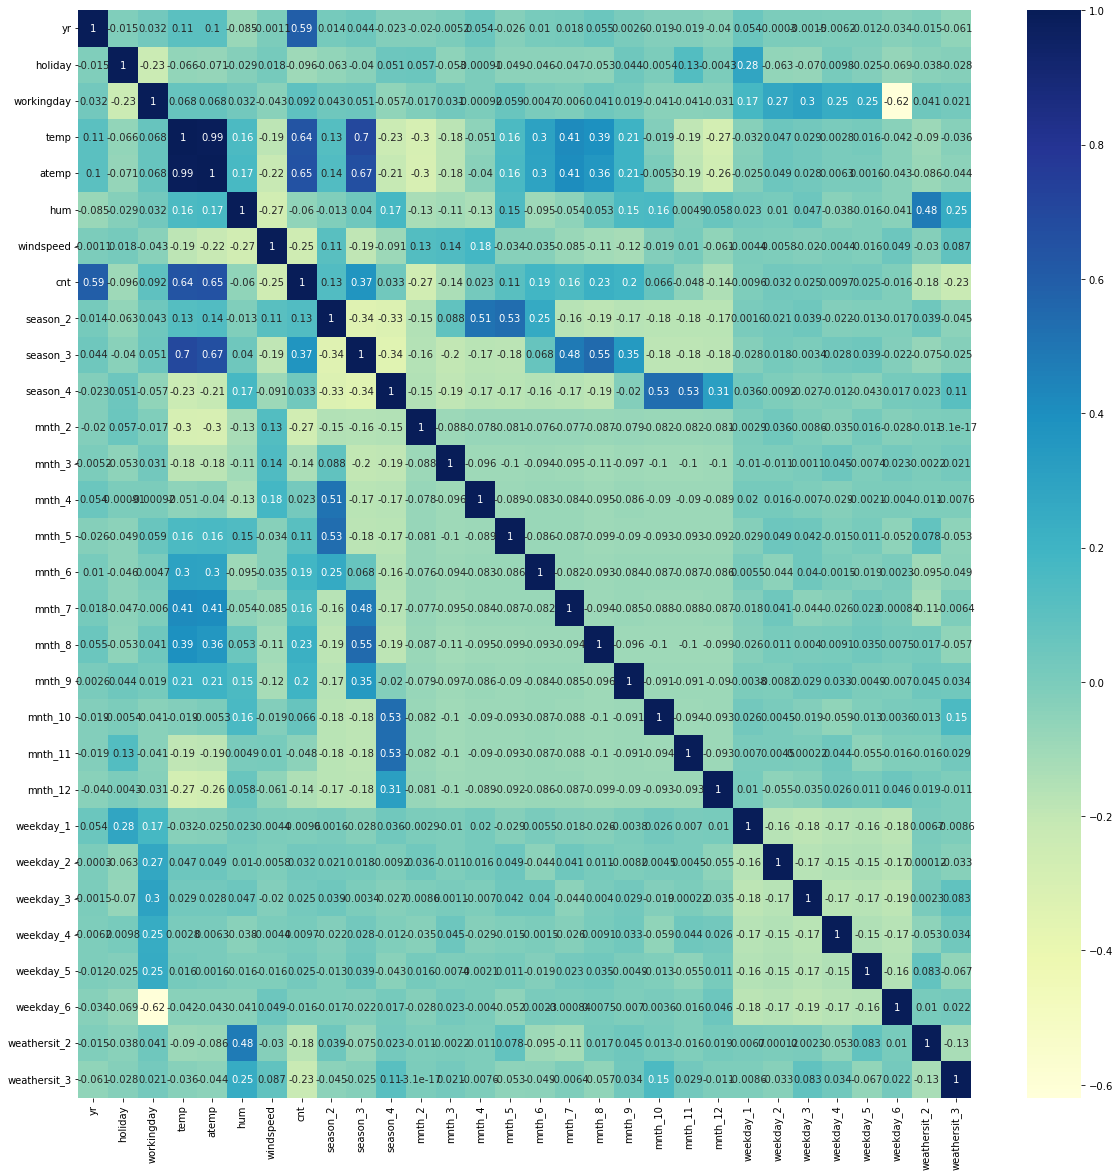

In [1314]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### temp and atemp  correlation strengths are same with cnt

### Dividing into X and Y sets for the model building

In [1315]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

#### we use recursive feature elimination and manual elimination for building model

In [1316]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1317]:
lm=LinearRegression()
lm.fit(X_train,y_train)
## we gave 15 as a parameter for rfe for shortlisting variables
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [1318]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [1319]:
## columns shortlisted by rfe
rf_1=X_train.columns[rfe.support_]
rf_1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [1320]:
## columns dropped from analysis by rfe
rf_2=X_train.columns[~rfe.support_]
rf_2

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [1321]:
X_train_rfe = X_train[rf_1]

## Building Model Adding all RFE variables

In [1322]:
## data frame is created with column names and their respective vif's
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.06
4,hum,17.47
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.44
8,season_4,2.88
13,weathersit_2,2.15
0,yr,2.04
12,weekday_6,1.90


In [1323]:
## BUILDING A LINEAR MODEL
X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params

const           0.195004
yr              0.230066
holiday        -0.054625
workingday      0.044634
temp            0.495994
hum            -0.162256
windspeed      -0.182417
season_2        0.117478
season_3        0.029493
season_4        0.143048
mnth_8          0.047452
mnth_9          0.117784
mnth_10         0.044229
weekday_6       0.053306
weathersit_2   -0.059181
weathersit_3   -0.252340
dtype: float64

In [1324]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.89e-191
Time:                        21:57:22   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791      0.000       0.139       0.251
yr               0.2301      0.008     28.776      0.000       0.214       0.246
holiday         -0.0546      0.027     -2.033      0.043      -0.107      -0.002
workingday       0.0446      0.012      3.877      0.000       0.022       0.067
temp             0.4960      0.034     14.803      0.000       0.430       0.562
hum             -0.1623      0.037     -4.353      0.000      -0.235      -0.089
windspeed       -0.1824      0.025     -7.200      0.000      -0.232      -0.133
season_2         0.1175      0.015      7.985      0.000       0.089       0.146
season_3         0.0295      0.022      1.346      0.179      -0.014       0.073
season_4         0.1430      0.013     10.688      0.000       0.117       0.169
mnth_8           0.0475      0.017      2.745      0.006       0.013       0.081
mnth_9           0.1178      0.017      6.895      0.000       0.084       0.151
mnth_10          0.0442      0.017      2.565      0.011       0.010       0.078
weekday_6        0.0533      0.015      3.676      0.000       0.025       0.082
weathersit_2    -0.0592      0.010     -5.702      0.000      -0.080      -0.039
weathersit_3    -0.2523      0.026     -9.655      0.000      -0.304      -0.201
==============================================================================
Omnibus:                       77.307   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.274
Skew:                          -0.748   Prob(JB):                     5.94e-46
Kurtosis:                       5.751   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### There is no variable with high p-value and vif value

### we will deal with high p and low vif value
 
### since season_3 has more p value and low vif value. we will drop the season_3 variable

In [1325]:
X_train_mod = X_train_rfe.drop(["season_3"], axis = 1)

In [1326]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values, i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,season_4,2.27
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.83
10,mnth_10,1.62


In [1327]:
## BUILDING A LINEAR MODEL AGAIN
X_train_lm2 = sm.add_constant(X_train_mod)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params

const           0.194540
yr              0.229153
holiday        -0.055848
workingday      0.044355
temp            0.530066
hum            -0.169212
windspeed      -0.185710
season_2        0.103928
season_4        0.134817
mnth_8          0.055981
mnth_9          0.125452
mnth_10         0.041091
weekday_6       0.052921
weathersit_2   -0.058227
weathersit_3   -0.248596
dtype: float64

In [1328]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.24e-192
Time:                        21:57:22   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770      0.000       0.138       0.251
yr               0.2292      0.008     28.743      0.000       0.213       0.245
holiday         -0.0558      0.027     -2.078      0.038      -0.109      -0.003
workingday       0.0444      0.012      3.850      0.000       0.022       0.067
temp             0.5301      0.022     24.136      0.000       0.487       0.573
hum             -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed       -0.1857      0.025     -7.359      0.000      -0.235      -0.136
season_2         0.1039      0.011      9.680      0.000       0.083       0.125
season_4         0.1348      0.012     11.316      0.000       0.111       0.158
mnth_8           0.0560      0.016      3.478      0.001       0.024       0.088
mnth_9           0.1255      0.016      7.783      0.000       0.094       0.157
mnth_10          0.0411      0.017      2.403      0.017       0.007       0.075
weekday_6        0.0529      0.015      3.647      0.000       0.024       0.081
weathersit_2    -0.0582      0.010     -5.618      0.000      -0.079      -0.038
weathersit_3    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### all p  has low values so going for high vif

Variable 'hum' will be dropped  as it has high VIF

and temp will remain. it is considered important and has strong correlation with cnt 

In [1329]:
X_train_mod = X_train_mod.drop(["hum"], axis = 1)

In [1330]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values, i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,season_4,2.02
5,season_2,1.82
10,weekday_6,1.77
9,mnth_10,1.62
7,mnth_8,1.59
11,weathersit_2,1.54


In [1331]:
## BUILDING A LINEAR MODEL AGAIN

X_train_lm3 = sm.add_constant(X_train_mod)

lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params

const           0.094532
yr              0.232930
holiday        -0.054309
workingday      0.047453
temp            0.509903
windspeed      -0.153226
season_2        0.100823
season_4        0.126698
mnth_8          0.054237
mnth_9          0.118863
mnth_10         0.037144
weekday_6       0.058013
weathersit_2   -0.085353
weathersit_3   -0.294243
dtype: float64

In [1332]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.16e-189
Time:                        21:57:22   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.019      4.961      0.000       0.057       0.132
yr               0.2329      0.008     28.799      0.000       0.217       0.249
holiday         -0.0543      0.027     -1.982      0.048      -0.108      -0.000
workingday       0.0475      0.012      4.045      0.000       0.024       0.070
temp             0.5099      0.022     23.236      0.000       0.467       0.553
windspeed       -0.1532      0.025     -6.203      0.000      -0.202      -0.105
season_2         0.1008      0.011      9.226      0.000       0.079       0.122
season_4         0.1267      0.012     10.544      0.000       0.103       0.150
mnth_8           0.0542      0.016      3.305      0.001       0.022       0.086
mnth_9           0.1189      0.016      7.259      0.000       0.087       0.151
mnth_10          0.0371      0.017      2.132      0.033       0.003       0.071
weekday_6        0.0580      0.015      3.931      0.000       0.029       0.087
weathersit_2    -0.0854      0.009     -9.839      0.000      -0.102      -0.068
weathersit_3    -0.2942      0.025    -12.009      0.000      -0.342      -0.246
==============================================================================
Omnibus:                       70.507   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.937
Skew:                          -0.704   Prob(JB):                     2.30e-39
Kurtosis:                       5.528   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  All the variables have  vif's in accepted range
removing the variable holiday as it has low vif

In [1333]:
X_train_mod = X_train_mod.drop(["holiday"], axis = 1)

In [1334]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values, i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,season_4,1.99
4,season_2,1.82
9,weekday_6,1.70
8,mnth_10,1.61
6,mnth_8,1.59
10,weathersit_2,1.54


In [1335]:
## BUILDING A LINEAR MODEL AGAIN
X_train_lm4 = sm.add_constant(X_train_mod)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.params

const           0.085592
yr              0.233075
workingday      0.055517
temp            0.511556
windspeed      -0.154220
season_2        0.101541
season_4        0.126028
mnth_8          0.054608
mnth_9          0.117202
mnth_10         0.038377
weekday_6       0.066176
weathersit_2   -0.084925
weathersit_3   -0.293233
dtype: float64

In [1336]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.86e-189
Time:                        21:57:22   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0856      0.019      4.610      0.000       0.049       0.122
yr               0.2331      0.008     28.734      0.000       0.217       0.249
workingday       0.0555      0.011      5.031      0.000       0.034       0.077
temp             0.5116      0.022     23.259      0.000       0.468       0.555
windspeed       -0.1542      0.025     -6.226      0.000      -0.203      -0.106
season_2         0.1015      0.011      9.269      0.000       0.080       0.123
season_4         0.1260      0.012     10.461      0.000       0.102       0.150
mnth_8           0.0546      0.016      3.318      0.001       0.022       0.087
mnth_9           0.1172      0.016      7.146      0.000       0.085       0.149
mnth_10          0.0384      0.017      2.198      0.028       0.004       0.073
weekday_6        0.0662      0.014      4.656      0.000       0.038       0.094
weathersit_2    -0.0849      0.009     -9.764      0.000      -0.102      -0.068
weathersit_3    -0.2932      0.025    -11.936      0.000      -0.342      -0.245
==============================================================================
Omnibus:                       74.837   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.872
Skew:                          -0.735   Prob(JB):                     4.83e-43
Kurtosis:                       5.647   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing the variable mnth_10 as it has high p value among all variables and also to reduce vif of temperature further down

In [1337]:
X_train_mod = X_train_mod.drop(["mnth_10"], axis = 1)

In [1338]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values, i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,season_2,1.81
8,weekday_6,1.69
6,mnth_8,1.58
9,weathersit_2,1.54
5,season_4,1.51
7,mnth_9,1.30


In [1339]:
## BUILDING A LINEAR MODEL AGAIN

X_train_lm5 = sm.add_constant(X_train_mod)

lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.params

const           0.081262
yr              0.232762
workingday      0.054815
temp            0.520871
windspeed      -0.151816
season_2        0.099835
season_4        0.139137
mnth_8          0.051245
mnth_9          0.111603
weekday_6       0.065514
weathersit_2   -0.083926
weathersit_3   -0.286920
dtype: float64

In [1340]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.00e-189
Time:                        21:57:23   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0813      0.019      4.384      0.000       0.045       0.118
yr               0.2328      0.008     28.590      0.000       0.217       0.249
workingday       0.0548      0.011      4.951      0.000       0.033       0.077
temp             0.5209      0.022     24.043      0.000       0.478       0.563
windspeed       -0.1518      0.025     -6.111      0.000      -0.201      -0.103
season_2         0.0998      0.011      9.102      0.000       0.078       0.121
season_4         0.1391      0.011     13.242      0.000       0.118       0.160
mnth_8           0.0512      0.016      3.115      0.002       0.019       0.084
mnth_9           0.1116      0.016      6.862      0.000       0.080       0.144
weekday_6        0.0655      0.014      4.593      0.000       0.037       0.094
weathersit_2    -0.0839      0.009     -9.626      0.000      -0.101      -0.067
weathersit_3    -0.2869      0.024    -11.714      0.000      -0.335      -0.239
==============================================================================
Omnibus:                       66.187   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.561
Skew:                          -0.676   Prob(JB):                     1.36e-35
Kurtosis:                       5.394   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping the mnth_8 variable as it has more p value compared to other variables 

In [1341]:
X_train_mod = X_train_mod.drop(["mnth_8"], axis = 1)

In [1342]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_mod.columns
vif['VIF'] = [variance_inflation_factor(X_train_mod.values, i) for i in range(X_train_mod.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_6,1.69
4,season_2,1.57
8,weathersit_2,1.53
5,season_4,1.40
6,mnth_9,1.20
9,weathersit_3,1.08


In [1343]:
## BUILDING A LINEAR MODEL AGAIN

X_train_lm6 = sm.add_constant(X_train_mod)

lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.params

const           0.075325
yr              0.233056
workingday      0.056323
temp            0.549936
windspeed      -0.155238
season_2        0.087429
season_4        0.131826
mnth_9          0.097236
weekday_6       0.067688
weathersit_2   -0.081347
weathersit_3   -0.288021
dtype: float64

In [1344]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.47e-188
Time:                        21:57:23   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0753      0.019      4.051      0.000       0.039       0.112
yr               0.2331      0.008     28.382      0.000       0.217       0.249
workingday       0.0563      0.011      5.048      0.000       0.034       0.078
temp             0.5499      0.020     27.885      0.000       0.511       0.589
windspeed       -0.1552      0.025     -6.201      0.000      -0.204      -0.106
season_2         0.0874      0.010      8.481      0.000       0.067       0.108
season_4         0.1318      0.010     12.760      0.000       0.112       0.152
mnth_9           0.0972      0.016      6.181      0.000       0.066       0.128
weekday_6        0.0677      0.014      4.710      0.000       0.039       0.096
weathersit_2    -0.0813      0.009     -9.292      0.000      -0.099      -0.064
weathersit_3    -0.2880      0.025    -11.659      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R2 and adjusted R2 are nearly same and explain 83 % variance in data
## The model is good and can generalize the data

## Step 6: Residual Analysis of the train data

In [1345]:
## taking values of x after removing the insignificant variables by rfe and manual elimination methods
y_pred_cnt = lr6.predict(X_train_lm6)

In [1346]:
res=y_train-y_pred_cnt

Text(0.5, 0, 'Errors')

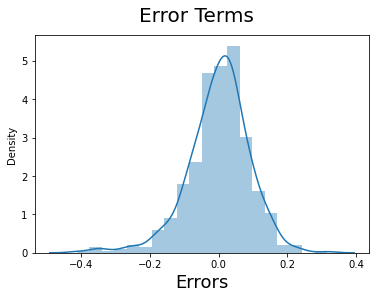

In [1347]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#####  From above graph, it is clearly seen that Error terms are normally distributed.  so,we can proceed further

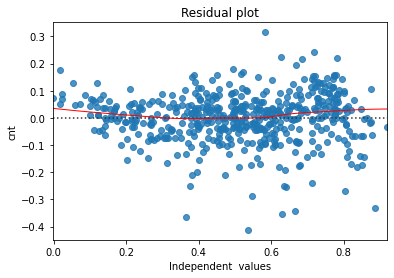

In [1348]:
# 5) Homoscedasticity of Residuals.
fig = plt.figure()
sns.residplot(y_pred_cnt,y_train,lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Independent  values")
plt.title('Residual plot')    
plt.show()


#### From the residual plot it's clear that there is no visble trend in the distribution of residuals.


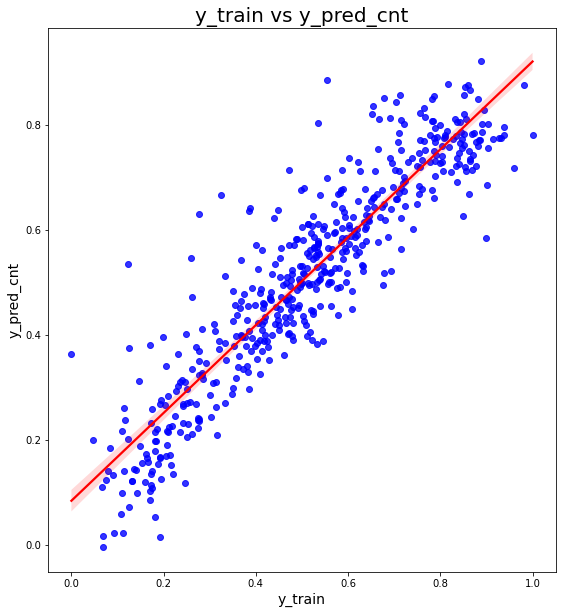

In [1349]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.regplot( y_train, y_pred_cnt, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_train vs y_pred_cnt', fontsize=20)              
plt.xlabel('y_train', fontsize=14)  
plt.ylabel('y_pred_cnt', fontsize=14) 
plt.show()

1. linear relation ship exists

## Step 7: Making Predictions Using the Final Model

In [1350]:
## apply scaling on test data set
num_vars = ['temp','atemp','hum','windspeed','cnt']


df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1351]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1352]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    float64
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

#### Dividing into X_test and y_test

In [1353]:
y_test = df_test.pop('cnt')
X_test = df_test


In [1354]:
## adding constant 
X_test_mod = sm.add_constant(X_test)

In [1355]:
## removing the insignificant variables and using the shortlisted variables
rm=['season_3','hum','holiday','mnth_8','mnth_10']
X_test_mod = X_test_mod.drop(rf_2, axis = 1)
X_test_mod=  X_test_mod.drop(rm, axis = 1)
                              


In [1356]:
## checking columns in train data and test data inputs after rfe and manual elimination method
X_train_lm6.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [1357]:
X_test_mod.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [1358]:
## predicitng the test data by using build linear model lr6
y_test_pred = lr6.predict(X_test_mod)

## Step 8: Model Evaluation


Text(0, 0.5, 'y_test_pred')

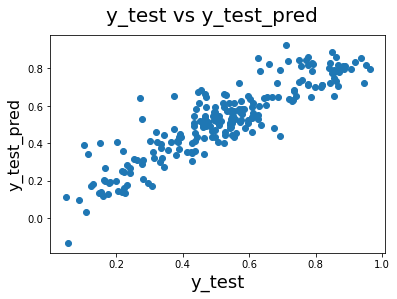

In [1359]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

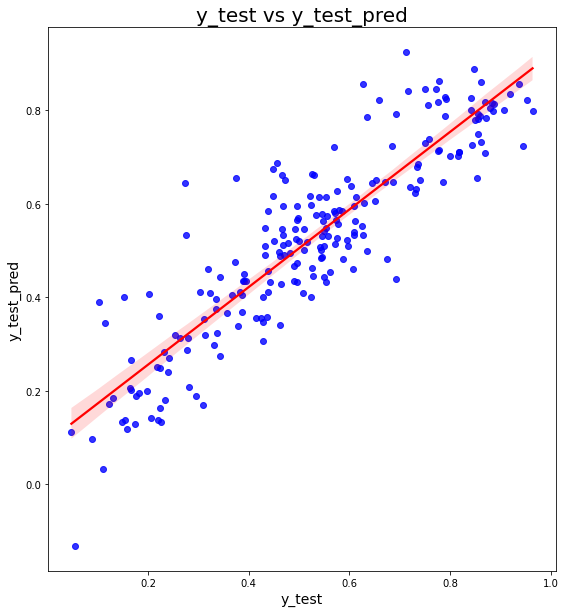

In [1360]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.regplot( y_test, y_test_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)   
plt.xlabel('y_test', fontsize=14)   
plt.ylabel('y_test_pred', fontsize=14) 
plt.show()

From both graphs we can say spread is good and shows good linear relationship

In [1361]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score     

In [1362]:
#r2 on train
r2_score(y_true=y_train,y_pred=y_pred_cnt)

0.8357769866151917

In [1363]:
#r2 on test
r2_test=r2_score(y_true=y_test,y_pred=y_test_pred)
r2_test

0.7955844377237248

In [1364]:
#mean squared error
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

0.009708882328806269

THe R2 on train data and test data are almost same and difference is within 3 %

mean squared error is also same 

we can use this model for improving bike rental business

In [1365]:
print(vif)
print(lr6.summary())

       Features   VIF
2          temp  4.76
1    workingday  4.04
3     windspeed  3.43
0            yr  2.02
7     weekday_6  1.69
4      season_2  1.57
8  weathersit_2  1.53
5      season_4  1.40
6        mnth_9  1.20
9  weathersit_3  1.08
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.47e-188
Time:                        21:57:26   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust          

FINAL EQUATION

cnt = 0.0753 + 0.2331 x yr + 0.0563 x workingday + 0.5499 x temp - 0.1552 x windspeed + 0.0874 x season_2 + 0.1318 x season_4 + 0.0972 x mnth_9 + 0.0677 x weekday_6 - 0.0813 x weathersit_2 - 0.2880 X weathersit_3

season_2= summer

season_4= winter

weekday_6= saturday

mnth_9= september

weathersit_2= Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

weathersit_3= Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds